In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt
from utils import make_pokemat
pokedex, pokelist, typelist, movelist, abilitylist, pokemat, index_lookup, index_name = make_pokemat()


In [2]:
def poke_decode(base_l, mult=None):
    if mult is None:
        l = base_l
    else:
        l = base_l * mult
    print('Types')
    tlist = sorted(enumerate(typelist), key=lambda x: l[x[0]])
    for i,t in tlist[:3]:
        print('\t',t,': ',l[i])
    print('\t...')
    for i,t in tlist[-3:]:
        print('\t',t,': ',l[i])
    print('Evo: ', l[18])
    print('Stats')
    print('\tHP:  ', l[19])
    print('\tAtk: ', l[20])
    print('\tDef: ', l[21])
    print('\tSpA: ', l[22])
    print('\tSpD: ', l[23])
    print('\tSpe: ', l[24])
    print('Abilities')
    alist = sorted(enumerate(abilitylist), key=lambda x: l[index_lookup['Ability: ' + x[1]]])
    for i,a in alist[:5]:
        print('\t',a,': ',l[index_lookup['Ability: ' + a]])
    print('\t...')
    for i,a in alist[-5:]:
        print('\t',a,': ',l[index_lookup['Ability: ' + a]])
    print('Moves')
    mlist = sorted(enumerate(movelist), key=lambda x: l[index_lookup['Move: ' + x[1]]])
    for i,m in mlist[:5]:
        print('\t',m,': ',l[index_lookup['Move: ' + m]])
    print('\t...')
    for i,m in mlist[-5:]:
        print('\t',m,': ',l[index_lookup['Move: ' + m]])
    print('Largest components: ')
    for i,x in sorted(enumerate(base_l), key=lambda x: -abs(x[1]))[:10]:
        print('\t',index_name[i],": ", x)
    print('Matching Pokemon: ')
    plist = sorted(enumerate(pokemat_std @ base_l), key=lambda x: x[1])
    for i,p in plist[:5]:
        print('\t', pokelist[i],': ', p)
    print('\t...')
    for i,p in plist[-5:]:
        print('\t', pokelist[i],': ', p)        


In [3]:
pokemean = np.mean(pokemat, axis=0)
pokemat_c = pokemat - pokemean
pokevar = np.std(pokemat_c, axis=0)
pokemat_std = pokemat_c / pokevar

u,s,vt = np.linalg.svd(pokemat_std, full_matrices=False)

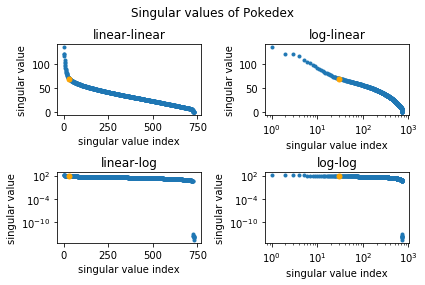

In [4]:
fig, axs = plt.subplots(2,2)

axs[0,0].plot(range(1,len(s)+1), s, '.')
axs[0,0].plot([30],[s[30]], '.', color='orange', markersize=10)
axs[0,0].set_title('linear-linear')


axs[1,0].semilogy(range(1,len(s)+1), s, '.')
axs[1,0].plot([30],[s[30]], '.', color='orange', markersize=10)
axs[1,0].set_title('linear-log')


axs[1,1].loglog(range(1,len(s)+1), s, '.')
axs[1,1].plot([30],[s[30]], '.', color='orange', markersize=10)
axs[1,1].set_title('log-log')


axs[0,1].semilogx(range(1,len(s)+1), s,'.')
axs[0,1].plot([30],[s[30]], '.', color='orange', markersize=10)
axs[0,1].set_title('log-linear')
fig.suptitle('Singular values of Pokedex')


for i in range(2):
    for j in range(2):
        axs[i,j].set_xlabel('singular value index')
        axs[i,j].set_ylabel('singular value')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

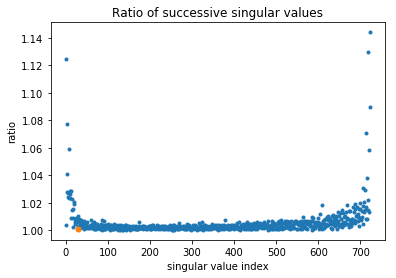

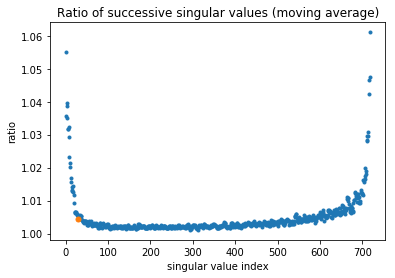

In [5]:
s_cutoff = np.argmax(s < 1e-10)
plt.plot(s[:s_cutoff-1] / s[1:s_cutoff], '.')
plt.plot([30], [s[30]/s[31]], '.', markersize=10)
plt.xlabel('singular value index')
plt.ylabel('ratio')
plt.title('Ratio of successive singular values')
plt.show()

plt.plot([ np.mean( s[i:i+5] / s[i+1:i+6]) for i in range(s_cutoff-6)], '.')
plt.plot([30], [np.mean(s[30:35]/s[31:36])], '.', markersize=10)
plt.xlabel('singular value index')
plt.ylabel('ratio')
plt.title('Ratio of successive singular values (moving average)')
plt.show()

In [7]:
for i in range(10):
    print(i, ') Variance explained: ', 100 * s[i]**2 / np.square(s).sum(), '%')
    poke_decode(u.T[i] @ pokemat_std)
    print('\n------\n')

0 ) Variance explained:  1.6005329256132634 %
Types
	 Ground :  -7.842690639669925
	 Rock :  -7.427309867430022
	 Fighting :  -6.711810973239124
	...
	 Grass :  7.991340126650104
	 Fairy :  9.73388308910039
	 Psychic :  15.433455316346192
Evo:  0.623304556730844
Stats
	HP:   -2.7464194907248975
	Atk:  -11.29837612478243
	Def:  -5.549751665421625
	SpA:  7.224040378967927
	SpD:  5.06510658441218
	Spe:  0.5509736771876355
Abilities
	 Rock Head :  -5.366632148394642
	 Mold Breaker :  -4.583375128153392
	 Sheer Force :  -4.576362112944529
	 Sturdy :  -4.273597088079944
	 Swift Swim :  -4.190268693604884
	...
	 Healer :  5.367723614159546
	 Chlorophyll :  5.478950433731872
	 Frisk :  5.538297166748326
	 Magic Guard :  6.5974013313840585
	 Synchronize :  8.473506240967037
Moves
	 rocktomb :  -13.64622513130153
	 stoneedge :  -12.630274412844862
	 rockslide :  -12.282327981594985
	 earthquake :  -11.530355194925852
	 bulldoze :  -11.232702455810747
	...
	 trick :  16.65753741034613
	 trickroom

	 Move: protect :  -11.789382300832772
	 Move: snore :  -11.663980423331722
	 Move: hyperbeam :  -11.523435115164713
	 Move: facade :  -11.516120311431353
	 Move: sleeptalk :  -11.499692518986336
Matching Pokemon: 
	 mew :  -1229.554478313836
	 dragonite :  -1156.2737724759888
	 zekrom :  -1088.6697854681727
	 kyuremwhite :  -1087.1972777434955
	 reshiram :  -1062.8231909112624
	...
	 necrozmaduskmane :  1088.15944761132
	 wobbuffet :  1094.3967468459045
	 wynaut :  1135.6473866874014
	 cosmoem :  1143.7544946988014
	 cosmog :  1246.0258568444822

------

7 ) Variance explained:  0.8524879122764168 %
Types
	 Poison :  -8.90866277214797
	 Fire :  -8.66587508638869
	 Ghost :  -8.55460963876972
	...
	 Psychic :  4.628108711587976
	 Fighting :  8.223942137548441
	 Flying :  8.36766861121142
Evo:  -4.433037098933142
Stats
	HP:   3.8259907169060567
	Atk:  5.1786471279469195
	Def:  2.1876992694964117
	SpA:  3.3263024636623664
	SpD:  4.528369653585771
	Spe:  5.945544571794245
Abilities
	 Flash

In [11]:
for i in range(1,11):
    print(-i, ') Variance explained: ', 100 * s[-i]**2 / np.square(s).sum(), '%')
    poke_decode(u.T[-i] @ pokemat_std)
    print('\n------\n')

-1 ) Variance explained:  5.764774353455046e-34 %
Types
	 Ghost :  -3.037067125566395e-15
	 Grass :  -2.173174834529945e-15
	 Dragon :  -1.7590096046404824e-15
	...
	 Poison :  1.773104232882794e-15
	 Water :  2.183800015820303e-15
	 Rock :  2.4882439858542327e-15
Evo:  -4.9873299934333204e-17
Stats
	HP:   1.835337437583462e-15
	Atk:  1.6961258786363231e-15
	Def:  1.3192572034803618e-15
	SpA:  1.139279642847768e-15
	SpD:  1.6683703030206942e-15
	Spe:  -1.7199783264310042e-15
Abilities
	 Friend Guard :  -4.921844182215196e-15
	 Iron Fist :  -4.8345116972214885e-15
	 Magic Guard :  -4.453685684135955e-15
	 Run Away :  -4.2782617726278005e-15
	 Imposter :  -3.836015706470963e-15
	...
	 Wimp Out :  3.4969314770261217e-15
	 White Smoke :  3.772589879380561e-15
	 Emergency Exit :  3.829998384413669e-15
	 Tangled Feet :  4.098013161452085e-15
	 Pastel Veil :  4.3141217594827586e-15
Moves
	 hydrocannon :  -8.518034368132366e-15
	 bulletpunch :  -8.052315324941217e-15
	 afteryou :  -5.352706125

	 Minus :  4.8093039967112006e-15
	 Drizzle :  4.824157566474252e-15
	 Water Veil :  5.384798509866506e-15
	 Surge Surfer :  6.823534792754771e-15
	 Water Absorb :  6.970118926474811e-15
Moves
	 volttackle :  -8.222589276130066e-15
	 moonlight :  -7.667911444686482e-15
	 shadowpunch :  -6.600189145222757e-15
	 suckerpunch :  -6.372940369869795e-15
	 meanlook :  -6.204672192700045e-15
	...
	 doublekick :  5.538104697055957e-15
	 auroraveil :  6.077820538519241e-15
	 magneticflux :  6.091698326327055e-15
	 celebrate :  9.46389234340872e-15
	 fling :  1.0227929614359255e-14
Largest components: 
	 Move: fling :  1.0227929614359255e-14
	 Move: celebrate :  9.46389234340872e-15
	 Spe 68 :  8.658655389903736e-15
	 Move: volttackle :  -8.222589276130066e-15
	 Move: moonlight :  -7.667911444686482e-15
	 Ability: Water Absorb :  6.970118926474811e-15
	 Ability: Surge Surfer :  6.823534792754771e-15
	 Spe 70 :  -6.7068746389953304e-15
	 Move: shadowpunch :  -6.600189145222757e-15
	 SpD 120 :  6.4

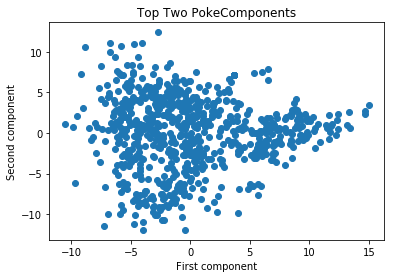

In [8]:
lowdim = u[:,:2] * s[:2]
plt.scatter(*lowdim.T)
plt.title('Top Two PokeComponents')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()

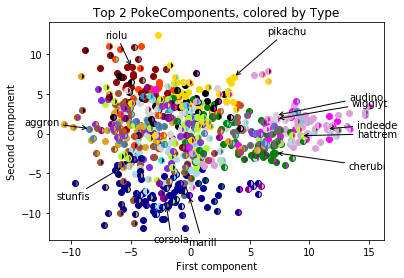

In [10]:
ptcolors = {'Bug':'greenyellow',
 'Dark': 'black',
 'Dragon': 'blueviolet',
 'Electric': 'gold',
 'Fairy': 'fuchsia',
 'Fighting': 'darkred',
 'Fire': 'orangered',
 'Flying': 'turquoise',
 'Ghost': 'dimgrey',
 'Grass': 'green',
 'Ground': 'goldenrod',
 'Ice': 'lightblue',
 'Normal': 'lightgrey',
 'Poison': 'darkmagenta',
 'Psychic': 'plum',
 'Rock': 'sienna', 
 'Steel': 'steelblue',
 'Water': 'darkblue'}

show_labels = True

for i,p in enumerate(pokelist):
    if len(pokedex[p]['types']) == 1:
        plt.scatter(*lowdim[i], color=ptcolors[pokedex[p]['types'][0]])
    else:
        plt.plot(*lowdim[i], color=ptcolors[pokedex[p]['types'][0]],linestyle='', marker='o', fillstyle='left',  markerfacecoloralt=ptcolors[pokedex[p]['types'][1]])
if show_labels:
    ctr = 0
    for i,p in enumerate(pokelist):
        if np.linalg.norm(lowdim[i]) > 7 and ctr % 20 == 0:
            plt.annotate(p[:7],lowdim[i], xytext=lowdim[i] / np.linalg.norm(lowdim[i]) * 14, arrowprops={'arrowstyle':'->'})
        ctr += 1
plt.title('Top 2 PokeComponents, colored by Type')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()